In [1]:
# This code implements padding with python on nifti images
# To check whether we get/achieve the same results, we implemented the same with FSL and compared the results on our own. 
# The results are the identical. 
# Test codes for FSL are in the draft scripts in the folder "draft_scripts"

In [2]:
# A thing to remember if you are using python to do padding:
# If you are using this process to pad, you have to use the same steps for all the labels and files. 
# Otherwise the results will be different due to misalignment.


In [3]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
# directories

maindir = "/Users/rashid_abid/Desktop/CS512_Computer_Vision/Project_proposal/final_project_draft2" # change this to your main directory
data_dir = os.path.join(maindir, "data_dir")

In [5]:
# read nifti file name and load data
subject_id = "sub001"
nifti_file = os.path.join(data_dir, subject_id, "QSM_dim256_w_bg.nii.gz") # QSM original file 
nifti_file = nib.load(nifti_file) # use nibabel to load nifti file
data = nifti_file.get_fdata()

In [6]:
# read header information 
header = nifti_file.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  1.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.11'
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 128.5
qoffset_y       : -140.0
qoffset_z       : -120.0
srow_x          : [ -1.    0.  

Text(0.5, 1.0, 'Coronal Slice')

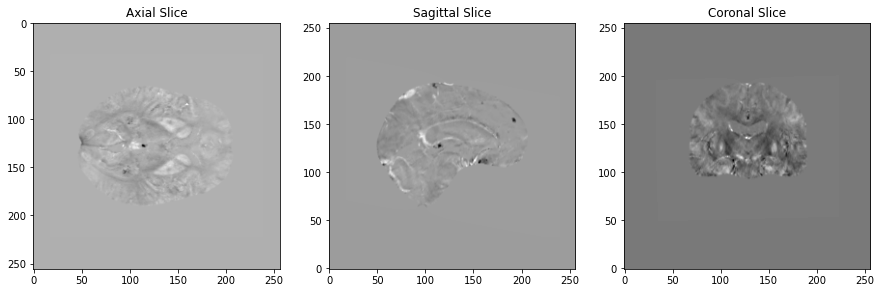

In [7]:
# show a slice of the data

# Choose the slices to show in each view 
# for easement we are selecting the middle slice
axial_slice = data.shape[2] // 2
sagittal_slice = data.shape[0] // 2
coronal_slice = data.shape[1] // 2

# Subplotting the slices
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Show the axial slice
axs[0].imshow(data[:, :, axial_slice], cmap='gray')
axs[0].set_title('Axial Slice')

# Show the sagittal slice
axs[1].imshow(data[sagittal_slice, :, :].T, cmap='gray', origin='lower')
axs[1].set_title('Sagittal Slice')

# Show the coronal slice
axs[2].imshow(data[:, coronal_slice, :].T, cmap='gray', origin='lower')
axs[2].set_title('Coronal Slice')

In [8]:
# select a new size for the image
new_shape = (512, 512, 512)

# select a new name for the image
new_nifti_file = os.path.join(data_dir, subject_id, "QSM_padded_to_dim512.nii.gz") # QSM new file with padding

In [9]:
# Get the current shape of the data
old_shape = data.shape
print(old_shape)

# Calculate the amount of padding needed for each dimension, on each side
x_dim, y_dim, z_dim = data.shape
pad_width = (( (max(0, new_shape[0] - x_dim)/2), max(0, new_shape[0] - x_dim)/2), (max(0, new_shape[1] - y_dim)/2, max(0, new_shape[1] - y_dim)/2), (max(0, new_shape[2] - z_dim)/2, max(0, new_shape[2] - z_dim)/2))

# make the values integers
pad_width = np.array(pad_width, dtype=int)
print(pad_width)

(256, 256, 256)
[[128 128]
 [128 128]
 [128 128]]


In [10]:
# Pad the data with zeros
print(data.shape)
padded_data = np.pad(data, pad_width)

print(padded_data.shape)

(256, 256, 256)
(512, 512, 512)


In [11]:
# Save the padded data to a new NIfTI file
# Have to be careful with the header information, so we have to copy the header from the original file
padded_nifti = nib.Nifti1Image(padded_data, nifti_file.affine, nifti_file.header)

nib.save(padded_nifti, new_nifti_file)